# **참고자료**

https://github.com/kurtsenol/machine-learning/blob/master/TopicModeling/Medium/LDA_articles.ipynb

# **데이터 로딩**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("/content/drive/MyDrive/텍스트마이닝_동아리/데이터_동아리/articles.xlsx", index_col=0)
df.head()

,Title,Journal,Year,Abstract
0,Title 1,Journal 1,1988,PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMEN...
1,Title 2,Journal 2,1982,PURPOSE EMPLOYEE WELLNESS IS VITAL TO CREATING...
2,Title 3,Journal 3,1981,PURPOSE TO INVESTIGATE IF ONLINE TV CONTENT PL...
3,Title 4,Journal 3,1990,PURPOSE RESPONDING TO AN INCREASING CALL FOR A...
4,Title 5,Journal 3,1990,PURPOSE THE PURPOSE OF THIS STUDY IS TO IDENTI...


In [3]:
df['Abstract'].iloc[0]

'PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     6000 non-null   object
 1   Journal   6000 non-null   object
 2   Year      6000 non-null   int64 
 3   Abstract  6000 non-null   object
dtypes: int64(1), object(3)
memory usage: 234.4+ KB


In [5]:
df['Journal'].value_counts()

Journal 15    972
Journal 8     899
Journal 2     616
Journal 10    327
Journal 4     317
Journal 5     310
Journal 1     306
Journal 3     298
Journal 6     293
Journal 12    292
Journal 14    275
Journal 13    274
Journal 7     274
Journal 11    274
Journal 9     273
Name: Journal, dtype: int64

In [6]:
df.groupby('Journal').size().reset_index(name = 'Values').sort_values('Values', ascending=False)

,Journal,Values
6,Journal 15,972
13,Journal 8,899
7,Journal 2,616
1,Journal 10,327
9,Journal 4,317
10,Journal 5,310
0,Journal 1,306
8,Journal 3,298
11,Journal 6,293
3,Journal 12,292


In [7]:
# order article counts per journal and get the index
order =df['Journal'].value_counts(ascending=False).index
order

Index(['Journal 15', 'Journal 8', 'Journal 2', 'Journal 10', 'Journal 4',
       'Journal 5', 'Journal 1', 'Journal 3', 'Journal 6', 'Journal 12',
       'Journal 14', 'Journal 13', 'Journal 7', 'Journal 11', 'Journal 9'],
      dtype='object')

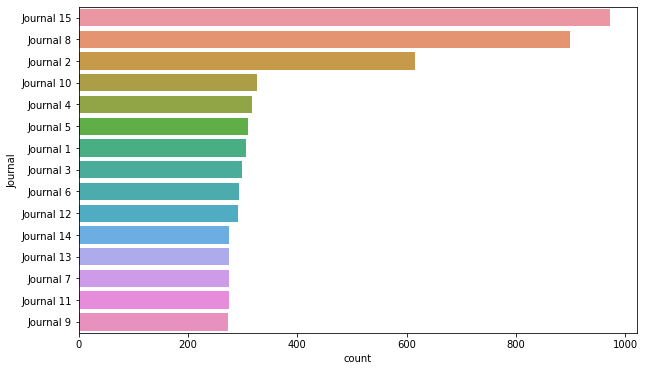

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(y='Journal', data=df, orient='h', order=order);

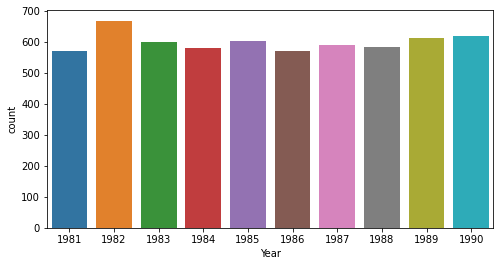

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x='Year', data=df);

In [12]:
pd.crosstab(df['Journal'], df['Year'])

Year,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
Journal,,,,,,,,,,
Journal 1,34,34,24,29,41,27,23,34,26,34
Journal 10,24,37,30,41,35,35,27,39,33,26
Journal 11,31,38,22,18,28,26,26,30,28,27
Journal 12,38,27,36,29,23,18,28,41,28,24
Journal 13,20,26,29,27,36,27,27,26,33,23
Journal 14,23,28,27,23,32,32,37,18,26,29
Journal 15,85,125,91,86,102,92,93,92,98,108
Journal 2,53,66,78,77,52,59,60,53,64,54
Journal 3,39,28,33,15,32,30,31,24,28,38


In [13]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
!pip install pyLDAvis==2.1.2 # colab에서는 최신 버전이 제대로 작동하지 않는 경우가 있음

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 13.1 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=ea18d7d6f77699d951c3d39ca65ffdf079d12fb2113f07382844b771f695a897
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


# **이 부분 부터 필요한 분석 스텝**

In [15]:
# nltk for stopwords
from nltk.corpus import stopwords
# spacy for lemmatization
import spacy

In [16]:
spacy.__version__ # 예전 버전이기 때문에 새로 업데이트가 필요 (로컬 환경에서 분석)

'2.2.4'

In [49]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) # parser = dependency parsing

In [18]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x7f7b9ddb9d10>)]

In [19]:
spacy_stopwords = nlp.Defaults.stop_words
print(type(spacy_stopwords))
print(len(spacy_stopwords))
print(spacy_stopwords)

<class 'set'>
326
{'around', 'neither', 'go', 'though', '‘m', 'seem', '‘re', 'moreover', 'everything', 'rather', 'thence', 'its', 're', 'front', 'someone', 'these', 'seeming', 'by', 'what', 'further', 'say', 'before', 'empty', 'hundred', 'quite', 'somehow', 'a', 'hereafter', 'also', 'nor', 'whoever', 'see', 'often', 'whereupon', 'across', 'more', 'am', 'thereupon', 'you', 'three', 'will', 'keep', 'there', 'anyway', 'full', "'re", 'whereas', 'ever', 'any', 'as', 'latter', 'same', 'move', 'this', 'above', 'your', '‘s', 'once', "'s", 'side', 'less', 'afterwards', 'hers', 'one', 'while', 'behind', 'do', 'along', 'them', 'into', '’re', 'so', 'is', 'most', 'below', '’ll', 'i', 'ourselves', 'too', 'when', 'almost', 'how', 'former', 'may', 'ca', 'should', 'via', 'n’t', 'the', 'formerly', 'sometimes', 'last', 'yours', 'ours', 'used', 'whereby', 'why', 'out', 'our', 'but', 'five', 'make', 'his', 'indeed', 'toward', 'noone', 'part', 'anything', 'nevertheless', 'which', 'still', 'latterly', 'yours

In [20]:
stop = stopwords.words('english')

In [21]:
missing_stop = []
for element in stop:
    if element not in spacy_stopwords:
        missing_stop.append(element) # len() was 56
print(len(missing_stop))

56


In [22]:
print(missing_stop)

["you're", "you've", "you'll", "you'd", "she's", "it's", 'theirs', "that'll", 'having', 's', 't', 'don', "don't", "should've", 'd', 'll', 'm', 'o', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


In [24]:
missing_stop.remove("won")
print(len(missing_stop))

ValueError: ignored

In [26]:
for w in missing_stop:
    nlp.vocab[w].is_stop = True  

In [27]:
# can be customized for further purpose ,
additional_word = ["e.g.","e.g","i.e.","i.e","nm",'wt','pt', "mg","ml"]
for element in additional_word:
    missing_stop.append(element)
spacy_stopwords.update(missing_stop)
print(len(spacy_stopwords))

390


In [ ]:
spacy_stopwords

In [28]:
data = list(df['Abstract'])
data[:2]

['PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH

In [29]:
# # speed test of spacy nlp function
# %%time 
# a = [nlp(t) for t in data]

CPU times: user 52.2 s, sys: 794 ms, total: 53 s
Wall time: 55.9 s


In [30]:
# # speed test using nlp.pipe
# %%time 
# b = [d for d in nlp.pipe(data)]

CPU times: user 30.7 s, sys: 1.06 s, total: 31.7 s
Wall time: 33.4 s


In [33]:
# # speed test using nlp.pipe + more processors
# %%time 
# c = [d for d in nlp.pipe(data, n_process= 4)]

CPU times: user 18.9 s, sys: 2.03 s, total: 21 s
Wall time: 45.3 s


In [37]:
# import spacy 
# nlp = spacy.load("en_core_web_sm")
# from spacy import displacy
# displacy.render(nlp("My name is Vincent"))

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="e7e2c6dd34654bbb95bfaf224544231e-0" class="displacy" width="750" height="224.5" direction="ltr" style="max-width: none; height: 224.5px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="134.5">\n    <tspan class="displacy-word" fill="currentColor" x="50">My</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">DET</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="134.5">\n    <tspan class="displacy-word" fill="currentColor" x="225">name</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">NOUN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="134.5">\n    <tspan class="displacy-word" fill="currentColor" x="400">is</tspan>\n    <tspan class="displacy-tag" dy

In [29]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [30]:
len(data)

6000

In [39]:
data[0]

'PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH 

# Bi-gram and Tri-gram

In [45]:
# sentences = [
#     'it is a science',
#     'research and development', 
#     'research and development',
#     'computer science'
# ]
# word_lsts = [s.lower().strip().split(" ") for s in sentences]
# for w in word_lsts:
#     print(w)

['it', 'is', 'a', 'science']
['research', 'and', 'development']
['research', 'and', 'development']
['computer', 'science']


In [48]:
# Bigram_Model = gensim.models.Phrases(word_lsts, min_count=1, threshold=1, delimiter=b"_")

# for w_l in word_lsts:
#     print(f"raw    sentences: {w_l}")
#     bigram_s = Bigram_Model[w_l]
#     print(f"Bigram sentences: {bigram_s}")
#     print("--"*20)

raw    sentences: ['it', 'is', 'a', 'science']
Bigram sentences: ['it', 'is', 'a', 'science']
----------------------------------------
raw    sentences: ['research', 'and', 'development']
Bigram sentences: ['research_and', 'development']
----------------------------------------
raw    sentences: ['research', 'and', 'development']
Bigram sentences: ['research_and', 'development']
----------------------------------------
raw    sentences: ['computer', 'science']
Bigram sentences: ['computer', 'science']
----------------------------------------


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [40]:
# Build the bigram and trigrams
bigram = gensim.models.Phrases(data, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data], threshold=100)  

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [41]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [43]:
# See trigram example
print(trigram_mod[bigram_mod[data[0]]])

['P', 'U', 'R', 'P', 'O', 'S', 'E', ' ', 'T', 'H', 'I', 'S', ' ', 'A', 'R', 'T', 'I', 'C', 'L', 'E', ' ', 'E', 'X', 'A', 'M', 'I', 'N', 'E', 'S', ' ', 'T', 'H', 'E', ' ', 'N', 'E', 'W', ' ', 'P', 'H', 'E', 'N', 'O', 'M', 'E', 'N', 'O', 'N', ' ', 'O', 'F', ' ', 'T', 'H', 'E', ' ', 'C', 'O', 'N', 'V', 'E', 'R', 'G', 'E', 'N', 'C', 'E', ' ', 'O', 'F', ' ', 'P', 'L', 'A', 'T', 'F', 'O', 'R', 'M', ' ', 'A', 'N', 'D', ' ', 'P', 'I', 'P', 'E', 'L', 'I', 'N', 'E', ' ', 'B', 'U', 'S', 'I', 'N', 'E', 'S', 'S', ' ', 'M', 'O', 'D', 'E', 'L', 'S', '.', ' ', 'I', 'T', ' ', 'E', 'X', 'A', 'M', 'I', 'N', 'E', 'S', ' ', 'T', 'H', 'E', ' ', 'P', 'O', 'T', 'E', 'N', 'T', 'I', 'A', 'L', ' ', 'S', 'Y', 'N', 'E', 'R', 'G', 'I', 'E', 'S', ' ', 'A', 'N', 'D', ' ', 'C', 'H', 'A', 'L', 'L', 'E', 'N', 'G', 'E', 'S', ' ', 'F', 'O', 'R', ' ', 'P', 'L', 'A', 'T', 'F', 'O', 'R', 'M', 'S', ' ', 'T', 'O', ' ', 'A', 'D', 'D', ' ', 'P', 'I', 'P', 'E', 'L', 'I', 'N', 'E', ' ', 'C', 'O', 'M', 'P', 'O', 'N', 'E', 'N', 'T',

# 본 내용

In [53]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
simple_preprocess(str(data[0]), deacc=True, min_len=3)

In [65]:
texts = [[word for word in simple_preprocess(str(data[0]), deacc=True, min_len=3) if word not in spacy_stopwords]]

In [ ]:
texts

In [67]:
texts = [bigram_mod[doc] for doc in texts]
texts = [trigram_mod[bigram_mod[doc]] for doc in texts]

In [76]:
print(texts)

[['purpose', 'article', 'examines', 'new', 'phenomenon', 'convergence', 'platform', 'pipeline', 'business', 'models', 'examines', 'potential', 'synergies', 'challenges', 'platforms', 'add', 'pipeline', 'components', 'vice', 'versa', 'pipeline', 'businesses', 'design', 'methodology', 'approach', 'paper', 'uses', 'conceptual', 'approach', 'synthesizes', 'integrates', 'literature', 'service', 'hospitality', 'strategy', 'supplements', 'illustrative', 'mini', 'case', 'studies', 'findings', 'extant', 'literature', 'typically', 'focuses', 'dichotomy', 'incumbent', 'pipeline', 'businesses', 'create', 'value', 'controlling', 'linear', 'series', 'activities', 'network', 'effects', 'driven', 'platforms', 'differentiate', 'types', 'platform', 'business', 'models', 'platforms', 'asset', 'control', 'platforms', 'peer', 'provided', 'assets', 'identify', 'common', 'pathways', 'convergence', 'pipelines', 'moving', 'platforms', 'asset', 'control', 'peer', 'provided', 'assets', 'platforms', 'peer', 'prov

In [82]:
print(data[0])

PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH P

In [78]:
y = " ".join(texts[0])

In [79]:
doc = nlp(y)
print(doc)

purpose article examines new phenomenon convergence platform pipeline business models examines potential synergies challenges platforms add pipeline components vice versa pipeline businesses design methodology approach paper uses conceptual approach synthesizes integrates literature service hospitality strategy supplements illustrative mini case studies findings extant literature typically focuses dichotomy incumbent pipeline businesses create value controlling linear series activities network effects driven platforms differentiate types platform business models platforms asset control platforms peer provided assets identify common pathways convergence pipelines moving platforms asset control peer provided assets platforms peer provided assets adopting defining business characteristics pipelines furthermore contrast key characteristics business models examine potential synergies challenges business model convergence findings suggest convergence pipelines platforms asset control natural

In [80]:
doc = nlp(y)
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_)

purpose purpose NOUN NN 
article article NOUN NN 
examines examine VERB VBZ 
new new ADJ JJ 
phenomenon phenomenon PROPN NNP 
convergence convergence NOUN NN 
platform platform NOUN NN 
pipeline pipeline NOUN NN 
business business NOUN NN 
models model NOUN NNS 
examines examine VERB VBZ 
potential potential ADJ JJ 
synergies synergy NOUN NNS 
challenges challenge VERB VBZ 
platforms platform NOUN NNS 
add add VERB VBP 
pipeline pipeline NOUN NN 
components component NOUN NNS 
vice vice NOUN NN 
versa versa ADP IN 
pipeline pipeline NOUN NN 
businesses business NOUN NNS 
design design VERB VBP 
methodology methodology NOUN NN 
approach approach NOUN NN 
paper paper NOUN NN 
uses use VERB VBZ 
conceptual conceptual ADJ JJ 
approach approach NOUN NN 
synthesizes synthesize VERB VBZ 
integrates integrates PROPN NNPS 
literature literature NOUN NN 
service service NOUN NN 
hospitality hospitality NOUN NN 
strategy strategy NOUN NN 
supplements supplement NOUN NNS 
illustrative illustrative

In [86]:
 texts_out = []

In [87]:
allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV', 'PROPN'] 

In [88]:
for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])

In [ ]:
 texts_out

In [90]:
def process_words(texts, stop_words=spacy_stopwords, allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV', 'PROPN'] ):
    
    """Convert a document into a list of lowercase tokens, build bigrams-trigrams, implement lemmatization"""
    
    # remove stopwords, short tokens and letter accents 
    texts = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts]
    
    # bi-gram and tri-gram implementation
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []

    # implement lemmatization and filter out unwanted part of speech tags
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
    # remove stopwords and short tokens again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out]    
    
    return texts_out

In [91]:
data_ready = process_words(data)  

In [92]:
print(data[0])

PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH P

In [93]:
print(data_ready[0])

['purpose', 'article', 'examine', 'new', 'phenomenon', 'convergence', 'platform', 'pipeline', 'business', 'model', 'examine', 'potential', 'synergy', 'challenge', 'platform', 'add', 'pipeline', 'component', 'vice', 'pipeline', 'business', 'design', 'methodology', 'approach', 'paper', 'use', 'conceptual', 'approach', 'synthesize', 'integrates', 'literature', 'service', 'hospitality', 'strategy', 'supplement', 'illustrative', 'mini', 'case', 'study', 'finding', 'extant', 'literature', 'typically', 'focus', 'dichotomy', 'incumbent', 'pipeline', 'business', 'create', 'value', 'control', 'linear', 'series', 'activity', 'network', 'effect', 'drive', 'platform', 'differentiate', 'type', 'platform', 'business', 'model', 'platforms', 'asset', 'control', 'platforms', 'peer', 'provide', 'asset', 'identify', 'common', 'pathway', 'convergence', 'pipeline', 'platforms', 'asset', 'control', 'peer', 'provide', 'asset', 'platform', 'peer', 'provide', 'asset', 'adopt', 'define', 'business', 'characteris

In [94]:
# "phenomenon" in data_ready[0]
# "phenomenon" in spacy_stopwords

True

In [ ]:
data_ready[1]

In [97]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 16325


In [98]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
corpus

In [100]:
len(corpus)

6000

In [101]:
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus:
      dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq

In [102]:
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

In [103]:
dict_df

,freq
activity,1082
add,136
adopt,431
approach,1804
article,943
...,...
paul,1
roundtable,2
fared,1
shoulder,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


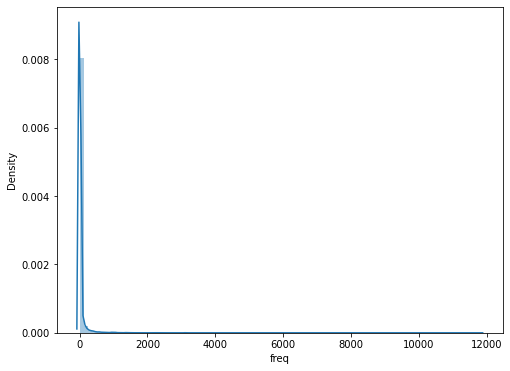

In [104]:
plt.figure(figsize=(8,6))
sns.distplot(dict_df['freq'], bins=100);

In [105]:
dict_df.sort_values('freq', ascending=False).head(10)

,freq
tourism,11806
study,7322
tourist,5555
destination,4178
research,4046
result,3283
service,3138
experience,3112
paper,3110
model,2900


In [106]:
extension = dict_df[dict_df.freq>1500].index.tolist()

In [107]:
extension

['approach',
 'effect',
 'examine',
 'finding',
 'implication',
 'model',
 'paper',
 'provide',
 'service',
 'study',
 'value',
 'customer',
 'factor',
 'influence',
 'research',
 'base',
 'experience',
 'result',
 'analysis',
 'development',
 'hotel',
 'impact',
 'social',
 'relationship',
 'tourism',
 'destination',
 'travel',
 'tourist',
 'visitor']

In [109]:
print(len(spacy_stopwords))

390


In [111]:
spacy_stopwords.update(extension)

In [112]:
print(len(spacy_stopwords))

419


In [113]:
data_ready = process_words(data)

In [114]:
print(data_ready[0])

['purpose', 'article', 'new', 'phenomenon', 'convergence', 'platform', 'pipeline', 'business', 'potential', 'synergy', 'challenge', 'platform', 'add', 'pipeline', 'component', 'vice', 'pipeline', 'business', 'design', 'methodology', 'use', 'conceptual', 'synthesize', 'integrates', 'literature', 'hospitality', 'strategy', 'supplement', 'illustrative', 'mini', 'case', 'extant', 'literature', 'typically', 'focus', 'dichotomy', 'incumbent', 'pipeline', 'business', 'create', 'control', 'linear', 'series', 'activity', 'network', 'drive', 'platform', 'differentiate', 'type', 'platform', 'business', 'platforms', 'asset', 'control', 'platforms', 'peer', 'asset', 'identify', 'common', 'pathway', 'convergence', 'pipeline', 'platforms', 'asset', 'control', 'peer', 'asset', 'platform', 'peer', 'asset', 'adopt', 'define', 'business', 'characteristic', 'pipeline', 'furthermore', 'contrast', 'key', 'characteristic', 'business', 'potential', 'synergy', 'challenge', 'business', 'convergence', 'suggest',

In [115]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 16340


In [116]:
# Filter out words that occur less than 10 documents, or more than 50% of the documents.

id2word.filter_extremes(no_below=10, no_above=0.5)

print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 3401


In [117]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [118]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2022-05-28 12:35:05--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-05-28 12:35:05--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  14.2MB/s    in 1.1s    

2022-05-28 12:35:07 (14.2 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [119]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [120]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [121]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [122]:
from pprint import pprint
# display topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('purpose', 0.0266074819110176),
   ('design', 0.02563247293067173),
   ('event', 0.024862728998819725),
   ('marketing', 0.02429825011546159),
   ('business', 0.024195617591214656),
   ('performance', 0.02409298506696772),
   ('strategy', 0.02029558166983117),
   ('manager', 0.01801200800533689),
   ('firm', 0.015985015651459947),
   ('product', 0.015882383127213014)]),
 (1,
  [('practice', 0.02376407244248654),
   ('stakeholder', 0.018477728830151738),
   ('system', 0.016960352422907488),
   ('perspective', 0.016862457170827214),
   ('knowledge', 0.016642192853646598),
   ('sustainability', 0.016324033284385708),
   ('issue', 0.016152716593245228),
   ('network', 0.015712187958883995),
   ('process', 0.015687714145863927),
   ('article', 0.015100342633382282)]),
 (2,
  [('image', 0.02940770779883583),
   ('role', 0.02102126955226351),
   ('negative', 0.020138486578940108),
   ('tour', 0.019338464509365775),
   ('employee', 0.017766007338133466),
   ('level', 0.017710833402300

In [123]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('Coherence Score: ', coherence_ldamallet)

Coherence Score:  0.41221191385634776


In [124]:
tm = ldamallet[corpus[1]]
tm

[(0, 0.17241379310344832),
 (1, 0.08045977011494254),
 (2, 0.3555555555555556),
 (3, 0.04137931034482759),
 (4, 0.0467432950191571),
 (5, 0.08122605363984675),
 (6, 0.07126436781609197),
 (7, 0.05517241379310346),
 (8, 0.061302681992337175),
 (9, 0.03448275862068966)]

In [ ]:
tm_results = ldamallet[corpus]

In [130]:
tm_results[0]

[(0, 0.44562647754137114),
 (1, 0.13534278959810875),
 (2, 0.047872340425531915),
 (3, 0.03368794326241135),
 (4, 0.04728132387706856),
 (5, 0.05969267139479906),
 (6, 0.09219858156028368),
 (7, 0.03900709219858156),
 (8, 0.050236406619385346),
 (9, 0.04905437352245863)]

In [127]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [128]:
len(corpus_topics)

6000

In [129]:
corpus_topics[0]

(0, 0.44562647754137114)

In [131]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]

In [133]:
topics[0]

[('purpose', 0.027),
 ('design', 0.026),
 ('event', 0.025),
 ('marketing', 0.024),
 ('business', 0.024),
 ('performance', 0.024),
 ('strategy', 0.02),
 ('manager', 0.018),
 ('firm', 0.016),
 ('product', 0.016),
 ('methodology', 0.015),
 ('innovation', 0.015),
 ('management', 0.014),
 ('industry', 0.013),
 ('identify', 0.012),
 ('develop', 0.012),
 ('festival', 0.011),
 ('resource', 0.011),
 ('technology', 0.011),
 ('focus', 0.011)]

In [134]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Term1,purpose,practice,image,satisfaction,change,brand,datum,cultural,community,economic
Term2,design,stakeholder,role,perceive,activity,theory,method,place,local,country
Term3,event,system,negative,intention,decision,develop,measure,site,resident,industry
Term4,marketing,perspective,tour,quality,risk,context,price,heritage,area,international
Term5,business,knowledge,employee,consumer,motivation,framework,data,chinese,benefit,growth


In [135]:
pd.set_option('display.max_colwidth', -1)

topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Terms per Topic
Topic1,"purpose, design, event, marketing, business, performance, strategy, manager, firm, product, methodology, innovation, management, industry, identify, develop, festival, resource, technology, focus"
Topic2,"practice, stakeholder, system, perspective, knowledge, sustainability, issue, network, process, article, sustainable, concept, challenge, address, volunteer, field, case, critical, policy, structure"
Topic3,"image, role, negative, tour, employee, level, positive, response, medium, behavior, guide, emotion, high, suggest, emotional, engagement, report, work, find, group"
Topic4,"satisfaction, perceive, intention, quality, consumer, attitude, online, test, significant, perception, affect, loyalty, survey, structural, information, investigate, positive, behavior, support, collect"
Topic5,"change, activity, decision, risk, motivation, group, climate, identify, visit, choice, information, type, difference, segment, trip, preference, traveler, high, survey, seek"
Topic6,"brand, theory, develop, context, framework, literature, behaviour, role, environmental, scale, theoretical, dimension, creation, hospitality, propose, contribution, personal, discuss, environment, identify"
Topic7,"datum, method, measure, price, data, number, propose, apply, attribute, compare, evaluate, accommodation, main, spatial, source, technique, time, analyze, attraction, city"
Topic8,"cultural, place, site, heritage, chinese, explore, form, host, culture, identity, home, authenticity, interview, people, power, relation, article, space, china, nature"
Topic9,"community, local, resident, area, benefit, management, food, park, national, rural, sustainable, support, include, potential, environmental, natural, participation, public, government, conservation"
Topic10,"economic, country, industry, international, growth, increase, demand, policy, region, long, economy, sector, year, market, term, income, high, rate, period, significant"


In [136]:
from wordcloud import WordCloud

In [137]:
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

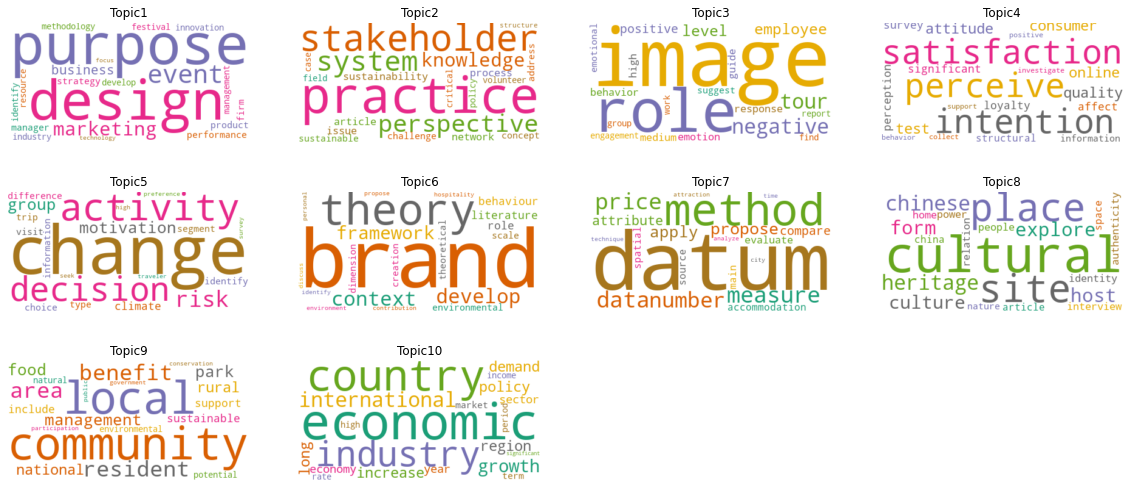

In [141]:
plt.figure(figsize=(20,15))
# Create subplots for each topic
for i in range(10):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [142]:
# create a dataframe 
corpus_topic_df = pd.DataFrame()

# get the Titles from the original dataframe
corpus_topic_df['Title'] = df.Title

corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]

corpus_topic_df.head()

,Title,Dominant Topic,Contribution %,Topic Terms
0,Title 1,1,44.56,"purpose, design, event, marketing, business, performance, strategy, manager, firm, product, methodology, innovation, management, industry, identify, develop, festival, resource, technology, focus"
1,Title 2,3,35.17,"image, role, negative, tour, employee, level, positive, response, medium, behavior, guide, emotion, high, suggest, emotional, engagement, report, work, find, group"
2,Title 3,4,23.46,"satisfaction, perceive, intention, quality, consumer, attitude, online, test, significant, perception, affect, loyalty, survey, structural, information, investigate, positive, behavior, support, collect"
3,Title 4,6,32.16,"brand, theory, develop, context, framework, literature, behaviour, role, environmental, scale, theoretical, dimension, creation, hospitality, propose, contribution, personal, discuss, environment, identify"
4,Title 5,1,23.85,"purpose, design, event, marketing, business, performance, strategy, manager, firm, product, methodology, innovation, management, industry, identify, develop, festival, resource, technology, focus"


In [143]:
len(corpus_topic_df)

6000

In [144]:
dominant_topic_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

dominant_topic_df['Total_Docs_Perc'] = dominant_topic_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(corpus), 2))

dominant_topic_df

,Dominant Topic,Doc_Count,Total_Docs_Perc
0,1,490,8.17
1,2,608,10.13
2,3,492,8.20
3,4,771,12.85
4,5,585,9.75
5,6,421,7.02
6,7,585,9.75
7,8,788,13.13
8,9,620,10.33
9,10,640,10.67


In [145]:
topic_counts = dominant_topic_df[["Dominant Topic", 	"Doc_Count", "Total_Docs_Perc"]]
topic_counts.columns  = ["Dominant Topic", 	"Document Count", "Total Document Percentage"]
topic_counts

,Dominant Topic,Document Count,Total Document Percentage
0,1,490,8.17
1,2,608,10.13
2,3,492,8.20
3,4,771,12.85
4,5,585,9.75
5,6,421,7.02
6,7,585,9.75
7,8,788,13.13
8,9,620,10.33
9,10,640,10.67


In [146]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])).reset_index(drop=True)

,Title,Dominant Topic,Contribution %,Topic Terms
0,Title 221,1,48.66,"purpose, design, event, marketing, business, performance, strategy, manager, firm, product, methodology, innovation, management, industry, identify, develop, festival, resource, technology, focus"
1,Title 883,2,46.82,"practice, stakeholder, system, perspective, knowledge, sustainability, issue, network, process, article, sustainable, concept, challenge, address, volunteer, field, case, critical, policy, structure"
2,Title 155,3,49.13,"image, role, negative, tour, employee, level, positive, response, medium, behavior, guide, emotion, high, suggest, emotional, engagement, report, work, find, group"
3,Title 2941,4,47.75,"satisfaction, perceive, intention, quality, consumer, attitude, online, test, significant, perception, affect, loyalty, survey, structural, information, investigate, positive, behavior, support, collect"
4,Title 3683,5,42.13,"change, activity, decision, risk, motivation, group, climate, identify, visit, choice, information, type, difference, segment, trip, preference, traveler, high, survey, seek"
5,Title 3310,6,42.19,"brand, theory, develop, context, framework, literature, behaviour, role, environmental, scale, theoretical, dimension, creation, hospitality, propose, contribution, personal, discuss, environment, identify"
6,Title 3077,7,44.81,"datum, method, measure, price, data, number, propose, apply, attribute, compare, evaluate, accommodation, main, spatial, source, technique, time, analyze, attraction, city"
7,Title 1591,8,42.13,"cultural, place, site, heritage, chinese, explore, form, host, culture, identity, home, authenticity, interview, people, power, relation, article, space, china, nature"
8,Title 4272,9,44.84,"community, local, resident, area, benefit, management, food, park, national, rural, sustainable, support, include, potential, environmental, natural, participation, public, government, conservation"
9,Title 865,10,61.34,"economic, country, industry, international, growth, increase, demand, policy, region, long, economy, sector, year, market, term, income, high, rate, period, significant"


In [147]:
pprint(tm_results[0])

[(0, 0.44562647754137114),
 (1, 0.13534278959810875),
 (2, 0.047872340425531915),
 (3, 0.03368794326241135),
 (4, 0.04728132387706856),
 (5, 0.05969267139479906),
 (6, 0.09219858156028368),
 (7, 0.03900709219858156),
 (8, 0.050236406619385346),
 (9, 0.04905437352245863)]


In [148]:
df_weights = pd.DataFrame.from_records([{v: k for v, k in row} for row in tm_results])
df_weights.columns = ['Topic ' + str(i) for i in range(1,11)]
df_weights

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,0.445626,0.135343,0.047872,0.033688,0.047281,0.059693,0.092199,0.039007,0.050236,0.049054
1,0.149425,0.087356,0.351724,0.044444,0.048276,0.084291,0.070498,0.064368,0.063602,0.036015
2,0.160801,0.046929,0.111801,0.234645,0.069703,0.059351,0.082816,0.100069,0.037957,0.095928
3,0.193188,0.106086,0.074260,0.042993,0.087661,0.321608,0.041876,0.063652,0.040201,0.028476
4,0.238539,0.150738,0.067599,0.045066,0.065268,0.146076,0.132867,0.058275,0.045066,0.050505
...,...,...,...,...,...,...,...,...,...,...
5995,0.123596,0.094881,0.164794,0.078652,0.083645,0.111111,0.063670,0.103620,0.111111,0.064919
5996,0.122112,0.082508,0.162816,0.167217,0.079208,0.132013,0.055006,0.085809,0.055006,0.058306
5997,0.066855,0.082863,0.141243,0.295669,0.091337,0.067797,0.054614,0.076271,0.070621,0.052731
5998,0.112293,0.076832,0.128842,0.086288,0.085106,0.072104,0.113475,0.170213,0.053191,0.101655


In [149]:
df_weights['Year'] = df.Year

In [150]:
df_weights

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Year
0,0.445626,0.135343,0.047872,0.033688,0.047281,0.059693,0.092199,0.039007,0.050236,0.049054,1988
1,0.149425,0.087356,0.351724,0.044444,0.048276,0.084291,0.070498,0.064368,0.063602,0.036015,1982
2,0.160801,0.046929,0.111801,0.234645,0.069703,0.059351,0.082816,0.100069,0.037957,0.095928,1981
3,0.193188,0.106086,0.074260,0.042993,0.087661,0.321608,0.041876,0.063652,0.040201,0.028476,1990
4,0.238539,0.150738,0.067599,0.045066,0.065268,0.146076,0.132867,0.058275,0.045066,0.050505,1990
...,...,...,...,...,...,...,...,...,...,...,...
5995,0.123596,0.094881,0.164794,0.078652,0.083645,0.111111,0.063670,0.103620,0.111111,0.064919,1983
5996,0.122112,0.082508,0.162816,0.167217,0.079208,0.132013,0.055006,0.085809,0.055006,0.058306,1983
5997,0.066855,0.082863,0.141243,0.295669,0.091337,0.067797,0.054614,0.076271,0.070621,0.052731,1989
5998,0.112293,0.076832,0.128842,0.086288,0.085106,0.072104,0.113475,0.170213,0.053191,0.101655,1987


In [151]:
df_weights.groupby('Year').mean()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Year,,,,,,,,,,
1981,0.098489,0.100692,0.097432,0.104571,0.101030,0.101207,0.098418,0.103505,0.095652,0.099002
1982,0.097407,0.102460,0.097147,0.102793,0.099805,0.097625,0.103608,0.102021,0.094403,0.102731
1983,0.098888,0.102680,0.095079,0.102196,0.098719,0.098158,0.103471,0.098388,0.099157,0.103265
1984,0.103079,0.104199,0.095964,0.101238,0.098698,0.097826,0.098508,0.101759,0.099714,0.099017
1985,0.097314,0.100025,0.099735,0.105746,0.100301,0.096521,0.102104,0.098412,0.099939,0.099903
1986,0.096537,0.106759,0.095127,0.103455,0.095938,0.099485,0.101668,0.101744,0.099163,0.100123
1987,0.101163,0.105346,0.094307,0.095703,0.097995,0.100276,0.099374,0.101677,0.102273,0.101886
1988,0.098051,0.103500,0.097499,0.099541,0.100331,0.099049,0.100229,0.104569,0.099293,0.097939
1989,0.096696,0.099899,0.101450,0.102979,0.099312,0.099546,0.099248,0.098984,0.099669,0.102217


In [152]:
df_weights['Dominant'] = df_weights.drop('Year', axis=1).idxmax(axis=1)

In [153]:
df_weights

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Year,Dominant
0,0.445626,0.135343,0.047872,0.033688,0.047281,0.059693,0.092199,0.039007,0.050236,0.049054,1988,Topic 1
1,0.149425,0.087356,0.351724,0.044444,0.048276,0.084291,0.070498,0.064368,0.063602,0.036015,1982,Topic 3
2,0.160801,0.046929,0.111801,0.234645,0.069703,0.059351,0.082816,0.100069,0.037957,0.095928,1981,Topic 4
3,0.193188,0.106086,0.074260,0.042993,0.087661,0.321608,0.041876,0.063652,0.040201,0.028476,1990,Topic 6
4,0.238539,0.150738,0.067599,0.045066,0.065268,0.146076,0.132867,0.058275,0.045066,0.050505,1990,Topic 1
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.123596,0.094881,0.164794,0.078652,0.083645,0.111111,0.063670,0.103620,0.111111,0.064919,1983,Topic 3
5996,0.122112,0.082508,0.162816,0.167217,0.079208,0.132013,0.055006,0.085809,0.055006,0.058306,1983,Topic 4
5997,0.066855,0.082863,0.141243,0.295669,0.091337,0.067797,0.054614,0.076271,0.070621,0.052731,1989,Topic 4
5998,0.112293,0.076832,0.128842,0.086288,0.085106,0.072104,0.113475,0.170213,0.053191,0.101655,1987,Topic 8


In [159]:
type(df_weights['Year'][0])

numpy.int64

In [162]:
len(df_weights[(df_weights['Year'] == 1981) & (df_weights['Dominant'] == 'Topic 1')])

47

In [165]:
len(df_weights[(df_weights['Year'] == 1981) & (df_weights['Dominant'] == 'Topic 2')])

46

In [163]:
len(df_weights[(df_weights['Year'] == 1981)])

570

In [ ]:
df_weights[(df_weights['Year'] == 1981) & (df_weights['Dominant'] == 'Topic 1')]

In [164]:
47/570

0.0824561403508772

In [166]:
46/570

0.08070175438596491

In [154]:
df_weights.groupby('Year')['Dominant'].value_counts(normalize=True)

Year  Dominant
1981  Topic 8     0.150877
      Topic 4     0.128070
      Topic 5     0.103509
      Topic 10    0.101754
      Topic 3     0.098246
                    ...   
1990  Topic 2     0.098387
      Topic 7     0.093548
      Topic 1     0.088710
      Topic 3     0.075806
      Topic 6     0.075806
Name: Dominant, Length: 100, dtype: float64

In [155]:
df_dominance = df_weights.groupby('Year')['Dominant'].value_counts(normalize=True).unstack()
df_dominance

Dominant,Topic 1,Topic 10,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Year,,,,,,,,,,
1981,0.082456,0.101754,0.080702,0.098246,0.128070,0.103509,0.077193,0.080702,0.150877,0.096491
1982,0.077728,0.098655,0.104634,0.082212,0.130045,0.097160,0.073244,0.115097,0.144993,0.076233
1983,0.081803,0.106845,0.095159,0.080134,0.140234,0.098497,0.070117,0.105175,0.120200,0.101836
1984,0.094502,0.099656,0.111684,0.070447,0.121993,0.101375,0.068729,0.096220,0.130584,0.104811
1985,0.068106,0.112957,0.098007,0.102990,0.141196,0.088040,0.058140,0.106312,0.124585,0.099668
1986,0.078671,0.089161,0.134615,0.071678,0.138112,0.087413,0.061189,0.103147,0.125874,0.110140
1987,0.094915,0.110169,0.103390,0.081356,0.101695,0.088136,0.077966,0.089831,0.123729,0.128814
1988,0.068611,0.099485,0.118353,0.066895,0.121784,0.109777,0.068611,0.099485,0.150943,0.096055
1989,0.081566,0.123980,0.070147,0.089723,0.140294,0.099511,0.070147,0.083197,0.119086,0.122349


In [156]:
df_weights["Journal"] = df.Journal

In [167]:
# df_journals = df_weights.groupby(['Journal', 'Year'])['Dominant'].value_counts(normalize=True).unstack()
# df_journals.head(15)

In [168]:
import seaborn as sns


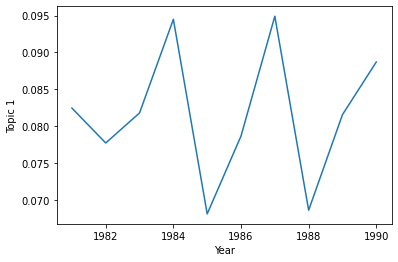

In [172]:
sns.lineplot(data=df_dominance['Topic 1'])

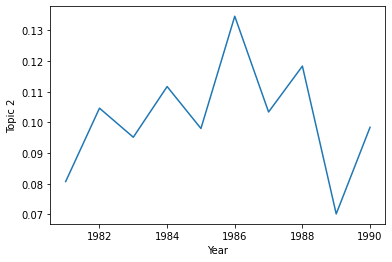

In [173]:
sns.lineplot(data=df_dominance['Topic 2'])

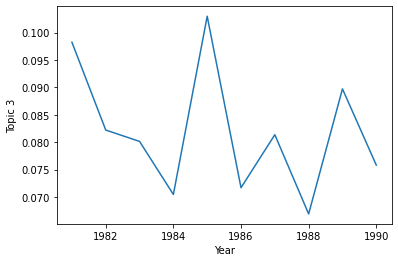

In [174]:
sns.lineplot(data=df_dominance['Topic 3'])

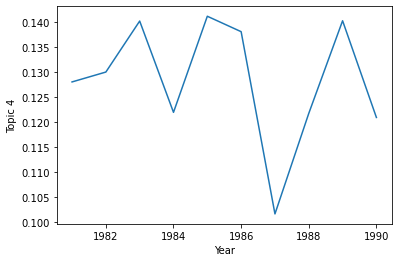

In [175]:
sns.lineplot(data=df_dominance['Topic 4'])